# PRABHAT SINGH
### 05-01-2024

# Topic
## Predictive Modeling of Income Levels based on Demographic and Employment Features

## Data preperation

Importing necessary libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind, ttest_rel
from scipy import stats
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Data_inc.csv')

In [3]:
data.shape

(32561, 16)

In [4]:
data.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income,Unnamed: 15
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,NaN
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,NaN
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,NaN
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,NaN
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,NaN


In [5]:
df = data.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               32561 non-null  int64  
 1   Profession Class  32561 non-null  object 
 2   Final_census      32561 non-null  int64  
 3    Education        32561 non-null  object 
 4    Education-num    32561 non-null  int64  
 5    marital-status   32561 non-null  object 
 6    occupation       32561 non-null  object 
 7    relationship     32561 non-null  object 
 8    race             32561 non-null  object 
 9   Gender            32561 non-null  object 
 10   capital-gain     32561 non-null  int64  
 11   capital-loss     32561 non-null  int64  
 12   hours-per-week   32561 non-null  int64  
 13   country          32561 non-null  object 
 14   income           32561 non-null  object 
 15  Unnamed: 15       2 non-null      float64
dtypes: float64(1), int64(6), object(9)
memor

In [7]:
df.columns

Index(['Age', 'Profession Class', 'Final_census', ' Education',
       ' Education-num', ' marital-status', ' occupation', ' relationship',
       ' race', 'Gender', ' capital-gain', ' capital-loss', ' hours-per-week',
       ' country', ' income', 'Unnamed: 15'],
      dtype='object')

In [8]:
df['Age'].value_counts()

36    898
31    888
34    886
23    877
35    876
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

In [9]:
df['Profession Class'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Profession Class, dtype: int64

In [10]:
df['Final_census'].value_counts()

164190    13
203488    13
123011    13
148995    12
121124    12
          ..
232784     1
325573     1
140176     1
318264     1
257302     1
Name: Final_census, Length: 21648, dtype: int64

In [11]:
df[' Education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name:  Education, dtype: int64

In [12]:
df[' Education-num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name:  Education-num, dtype: int64

In [13]:
df[' marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name:  marital-status, dtype: int64

In [14]:
df[' occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name:  occupation, dtype: int64

In [15]:
df[' relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name:  relationship, dtype: int64

In [16]:
df[' race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name:  race, dtype: int64

In [17]:
df['Gender'].value_counts()

 Male      21790
 Female    10771
Name: Gender, dtype: int64

In [18]:
df[' country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [19]:
df[' income'].value_counts()

 <=50K    24720
 >50K      7841
Name:  income, dtype: int64

In [20]:
df.isnull().sum()

Age                     0
Profession Class        0
Final_census            0
 Education              0
 Education-num          0
 marital-status         0
 occupation             0
 relationship           0
 race                   0
Gender                  0
 capital-gain           0
 capital-loss           0
 hours-per-week         0
 country                0
 income                 0
Unnamed: 15         32559
dtype: int64

In [21]:
df.columns

Index(['Age', 'Profession Class', 'Final_census', ' Education',
       ' Education-num', ' marital-status', ' occupation', ' relationship',
       ' race', 'Gender', ' capital-gain', ' capital-loss', ' hours-per-week',
       ' country', ' income', 'Unnamed: 15'],
      dtype='object')

In [22]:
df.rename(columns={' Education': 'Education', ' Education-num': 'Education-num', ' marital-status': 'marital-status', ' occupation': 'occupation', ' relationship': 'relationship',' race': 'race', ' capital-gain': 'capital-gain', ' capital-loss': 'capital-loss',' relationship': 'relationship', ' hours-per-week': 'hours-per-week', ' country': 'country', ' income': 'income'}, inplace=True)


In [23]:
df.columns

Index(['Age', 'Profession Class', 'Final_census', 'Education', 'Education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'Gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'income',
       'Unnamed: 15'],
      dtype='object')

In [24]:
df.isnull().sum()

Age                     0
Profession Class        0
Final_census            0
Education               0
Education-num           0
marital-status          0
occupation              0
relationship            0
race                    0
Gender                  0
capital-gain            0
capital-loss            0
hours-per-week          0
country                 0
income                  0
Unnamed: 15         32559
dtype: int64

In [25]:
df['Profession Class'].replace(to_replace=' ?', value=np.nan, inplace=True)
df['occupation'].replace(to_replace=' ?', value=np.nan, inplace=True)
df['country'].replace(to_replace=' ?', value=np.nan, inplace=True)

In [26]:
df.isnull().sum()

Age                     0
Profession Class     1836
Final_census            0
Education               0
Education-num           0
marital-status          0
occupation           1843
relationship            0
race                    0
Gender                  0
capital-gain            0
capital-loss            0
hours-per-week          0
country               583
income                  0
Unnamed: 15         32559
dtype: int64

In [27]:
df['Profession Class'] = df['Profession Class'].fillna(df['Profession Class'].mode()[0])
df['occupation'] = df['occupation'].fillna(df['occupation'].mode()[0])
df['country'] = df['country'].fillna(df['country'].mode()[0])
#df = df.dropna(subset='occupation')

In [28]:
df.isnull().sum()

Age                     0
Profession Class        0
Final_census            0
Education               0
Education-num           0
marital-status          0
occupation              0
relationship            0
race                    0
Gender                  0
capital-gain            0
capital-loss            0
hours-per-week          0
country                 0
income                  0
Unnamed: 15         32559
dtype: int64

In [29]:
df.drop('Unnamed: 15', axis=1, inplace=True)

In [30]:
df.shape

(32561, 15)

In [31]:
df.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               32561 non-null  int64 
 1   Profession Class  32561 non-null  object
 2   Final_census      32561 non-null  int64 
 3   Education         32561 non-null  object
 4   Education-num     32561 non-null  int64 
 5   marital-status    32561 non-null  object
 6   occupation        32561 non-null  object
 7   relationship      32561 non-null  object
 8   race              32561 non-null  object
 9   Gender            32561 non-null  object
 10  capital-gain      32561 non-null  int64 
 11  capital-loss      32561 non-null  int64 
 12  hours-per-week    32561 non-null  int64 
 13  country           32561 non-null  object
 14  income            32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [33]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [34]:
df["marital-status"] = df["marital-status"].replace([' Never-married',' Divorced',' Separated',' Widowed'], 'Single')
df["marital-status"] = df["marital-status"].replace([' Married-civ-spouse',' Married-spouse-absent',' Married-AF-spouse'], 'Married')
df['marital-status'].value_counts()

Single     17144
Married    15417
Name: marital-status, dtype: int64

# Exploratory Data Analysis


In [35]:
df.describe()

,Age,Final_census,Education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


# Summary of Numeric Attributes:
## Age:
* The average age value is 38.
* Age is having the standard deviation 13.20 which indicates the deviation of an observation from the mean.
* The value of Age attribute varies from 17 to 90.
* The 1st quartile is 28 i.e. 25% of the observations lies below 28.
* 3rd quartile is 47 which indicates that in 75% of the observations the value of age is less than 47.
* The difference between 1st quartile and the minimum is lesser than the difference between 3rd quartile and the maximum which is showing that the data is more dispersed after the value 47.
* The difference between mean & median is not significantly high but the difference between 3rd quartile & maximum makes the distribution right skewed.

## Final_census:
* This is the sampling population corresponding to the observations.
* Final_census seems to be rightly skewed since there is very large distance between median & maximum value as compared to minimum & median value

## Capital Gain :
* For capital-gain, the mean is 1114.33 and median is 0, which indicates that the distribution is highly right skewed.
* From the quartiles it is clearly visible that 75% observations are having capital gain zero.
* capital-gain is concentrated on the one particular value i.e. zero and other are spread after 3rd quartile which results as the large standard deviation (7589.57).
* capital-gain shows that either a person has no gain or has gain of very large amount (10k or 99k).

## Capital Loss :
* This attribute is similar to the capital-gain i.e. most of the values are centered on 0 (this can be told using the summary statistic as minimum is 0 and values lie under 75 percentile is also zero).
* Mean is 89 but median is 0 (i.e. mean is greater than median this tells us that it is right skewed distribution).

## Hours per Week :
* This attribute means number of working hours spend by an individual in a week.
* In this data the hours per week atrribute varies within the range of 1 to 99.
* 75 percentage of the people spend 45 or less working hours per week.
* The IQR is very less i.e. [40-45] which indicates that 50% of the observations are concentrated between 40 & 45.
* Observations are very sparse below 25th percentile and after 75th percentile.
* Using quartiles, we can say that data is approximately symmetric.
* Minimum is 1 hour per week & maximum value is 99 hours per week means person spending 99 working hours per week are very rare events. We will later analyze that which Profession Class they belong.

In [36]:
df.describe(include=['O'])

,Profession Class,Education,marital-status,occupation,relationship,race,Gender,country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,8,16,2,14,6,5,2,41,2
top,Private,HS-grad,Single,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,10501,17144,5983,13193,27816,21790,29753,24720


# Summary of Categorical Attributes:

* Country has maximum number of unique categories i.e. 41 categories.
* But the Country is highly biased toward the United-State which has frequency of 42103 (91.4%).
* Occupation has more or less uniform distribution of categories as comparerd to the other attributes.
* Race is also biased to the white race category (39444) with 85.7%.
* The top category in profession class is Private having frequency 33906 with 73.7%.

# Univariate Analysis

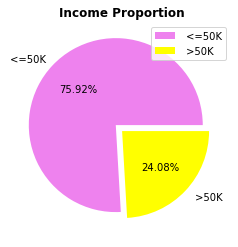

In [37]:
plt.pie(df['income'].value_counts(), labels=df['income'].value_counts().index,
autopct='%.2f%%', explode=[0.1,0], colors=['violet', 'yellow'])
plt.title('Income Proportion', fontweight='bold')
plt.legend()
plt.show()

More than 75% of the people from this dataset earn less than or equal to 50K.


In [38]:
num_col = [k for k in df.columns if df[k].dtype !='O']
print(num_col)


['Age', 'Final_census', 'Education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


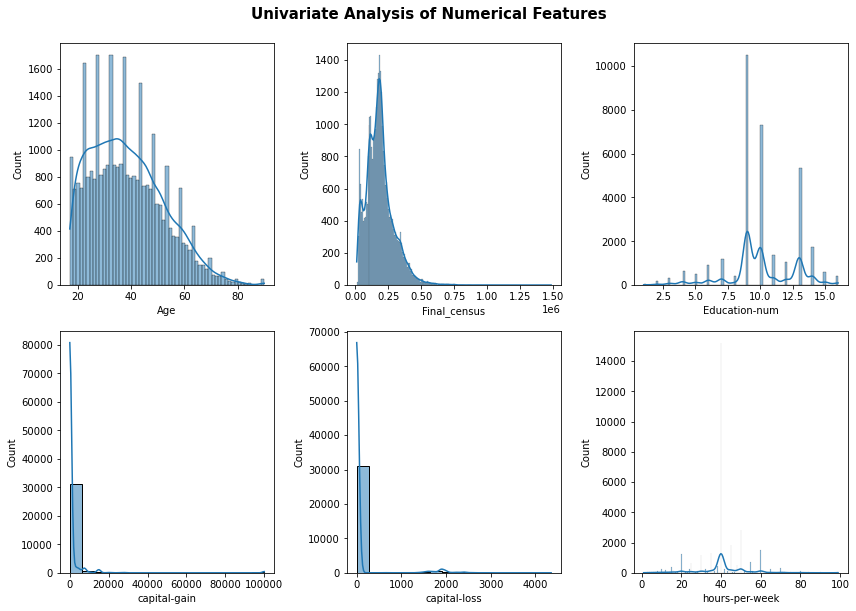

In [39]:
plt.figure(figsize = [12,20])
plt.suptitle('Univariate Analysis of Numerical Features', fontsize=15, fontweight='bold', y=1)
for i in range(0, len(num_col)):    
    plt.subplot(5, 3, i+1)
    sns.histplot(df[num_col[i]], kde=True)
    plt.xlabel(num_col[i])
    plt.tight_layout()

# Summary of the Distribution for Univariate Analysis:

## Age:
* "Age" attribute is not symmetric.
* It is right-skewed. (More younger adult earn wages than the older ones)
* This dataset has fewer observations of people's age after certain age i.e. 70 years.

## Final_census:
* Final_census variable may stand for a population of an observation.
* This is the sampling population corresponding to the observations.
* The distribution of Final census seems to be rightly skewed since mean is greater than median.

## Capital Gain:
* The histogram shows that most of the "capital-gain" values are centered on 0 and few on 10k and 99k.
* capital-gain is concentrated on the one particular value and other are spread with large standard deviation.
* capital-gain shows that either a person has no gain or has gain of very large amount. (10k or 99k).

## Capital Loss:
* The histogram shows that most of the "capital-loss" values are centered on 0 and only few are non zero.
* This attribute is similar to the capital-gain i.e. most of the values are centered on 0 (nearly 43000 of them).

## Hours per Week:
* Most people work 30-40 hours per week, they are roughly 27,000 people.
* There are also few people who works 80-100 hours per week and some less than 20 which is unusual.
* 75 percentage of the people spend 45 or less working hours per week.


# Bivariate Analysis of Numerical and Categorical Features

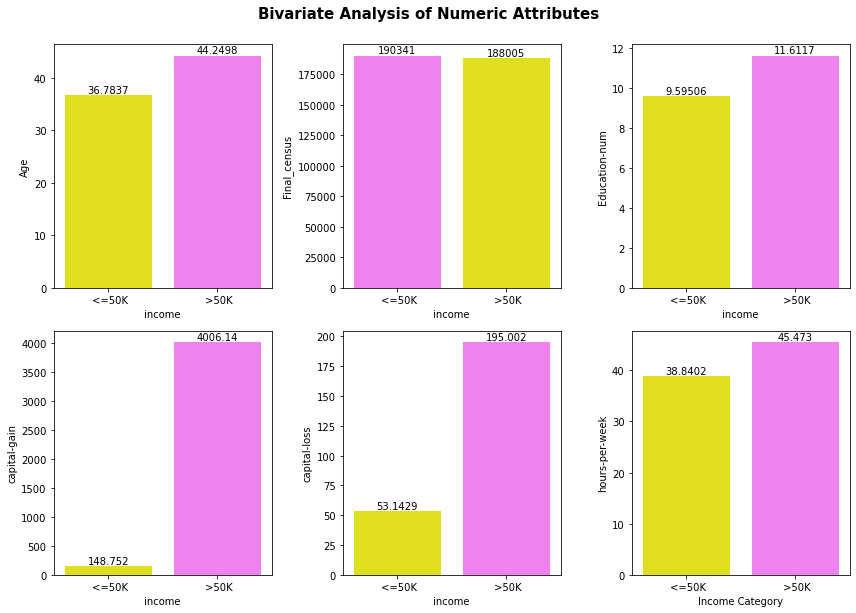

In [40]:
plt.figure(figsize=[12, 20])
plt.suptitle('Bivariate Analysis of Numeric Attributes', fontsize=15, fontweight='bold', y=1)
for i in range(0, len(num_col)):
    plt.subplot(5, 3, i+1)
    bar = sns.barplot(y=num_col[i], x='income', data=df, color='yellow', ci=None)
    for label in bar.containers:
        bar.bar_label(label, fontsize=10)
    patch_h = [patch.get_height() for patch in bar.patches]
    idx_tallest = np.argmax(patch_h)
    bar.patches[idx_tallest].set_facecolor('violet')
plt.xlabel('Income Category')
plt.tight_layout()
plt.show()

In [41]:
cat_col = [j for j in df.columns if (df[j].dtype =='O') & (j != 'income') & (j != 'country')]
print(cat_col)

['Profession Class', 'Education', 'marital-status', 'occupation', 'relationship', 'race', 'Gender']


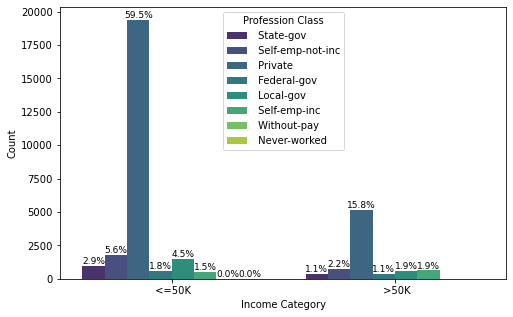

In [49]:
plt.figure(figsize=[8, 5])
ax = sns.countplot(x='income', hue='Profession Class', data=df, palette='viridis')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height / total * 100):.1f}%',
                xy=(p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)

plt.xlabel('Income Category')
plt.ylabel('Count')
plt.legend(loc='best', title='Profession Class')
plt.show()


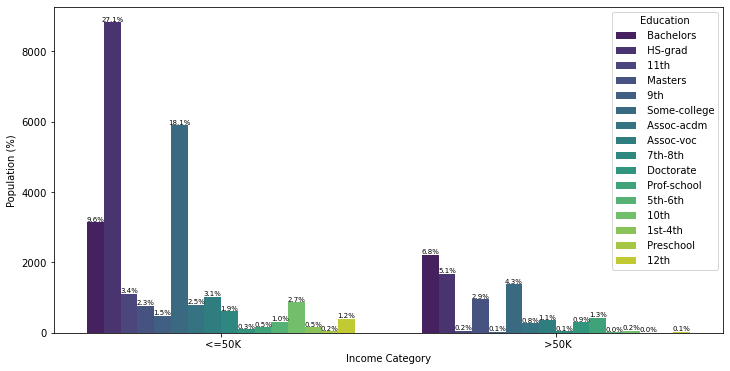

In [52]:
plt.figure(figsize=[12, 6])
ax = sns.countplot(x='income', hue='Education', data=df, palette='viridis')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height / total * 100):.1f}%',
                xy=(p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=7)

plt.xlabel('Income Category')
plt.ylabel('Population (%)')
plt.legend(loc='best', title='Education')
plt.show()


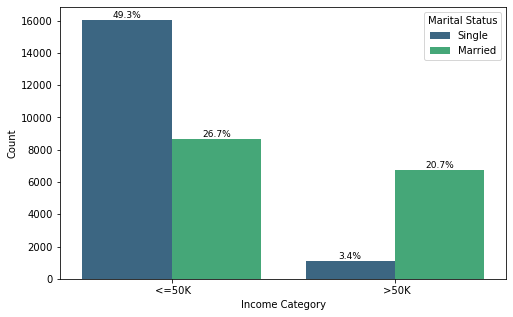

In [53]:
plt.figure(figsize=[8, 5])
ax = sns.countplot(x='income', hue='marital-status', data=df, palette='viridis')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height / total * 100):.1f}%',
                xy=(p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=9)

plt.xlabel('Income Category')
plt.ylabel('Count')
plt.legend(loc='best', title='Marital Status')
plt.show()

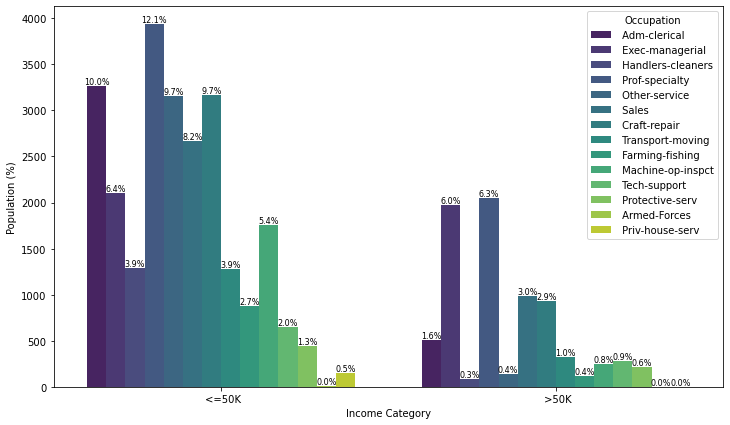

In [55]:
plt.figure(figsize=[12, 7])
ax = sns.countplot(x='income', hue='occupation', data=df, palette='viridis')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height / total * 100):.1f}%',
                xy=(p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=8)

plt.xlabel('Income Category')
plt.ylabel('Population (%)')
plt.legend(loc='best', title='Occupation')
plt.show()


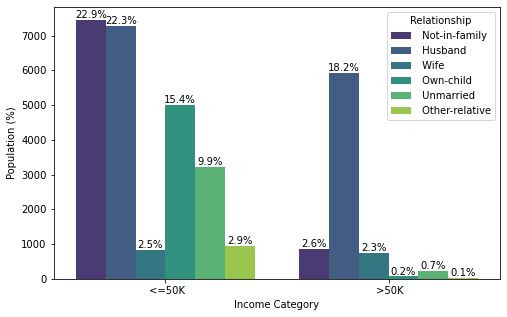

In [56]:
plt.figure(figsize=[8, 5])
ax = sns.countplot(x='income', hue='relationship', data=df, palette='viridis')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height / total * 100):.1f}%',
                xy=(p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)

plt.xlabel('Income Category')
plt.ylabel('Population (%)')
plt.legend(loc='best', title='Relationship')
plt.show()


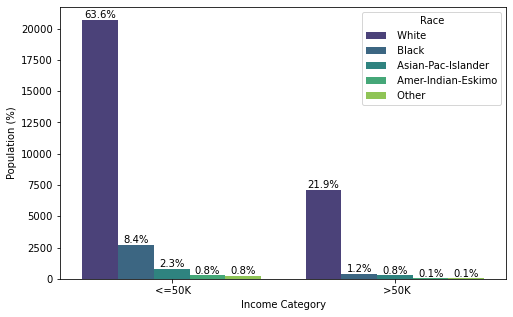

In [57]:
plt.figure(figsize=[8, 5])
ax = sns.countplot(x='income', hue='race', data=df, palette='viridis')
total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{(height / total * 100):.1f}%',
                xy=(p.get_x() + p.get_width() / 2., height),
                ha='center', va='bottom', fontsize=10)
plt.xlabel('Income Category')
plt.ylabel('Population (%)')
plt.legend(loc='best', title='Race')
plt.show()

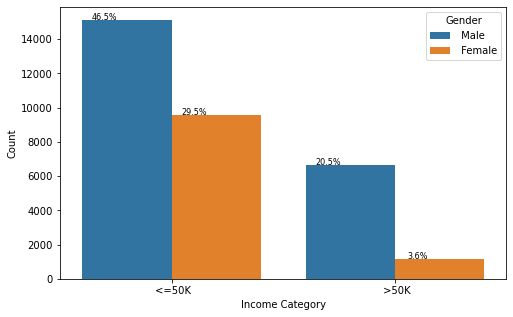

In [68]:
plt.figure(figsize=[8, 5])
ax = sns.countplot(x='income', hue='Gender', data=df)


total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 0.02
    ax.annotate(percentage, (x, y), ha='center', fontsize=8)

plt.xlabel('Income Category')
plt.ylabel('Count')
plt.legend(loc='best', title='Gender')
plt.show()


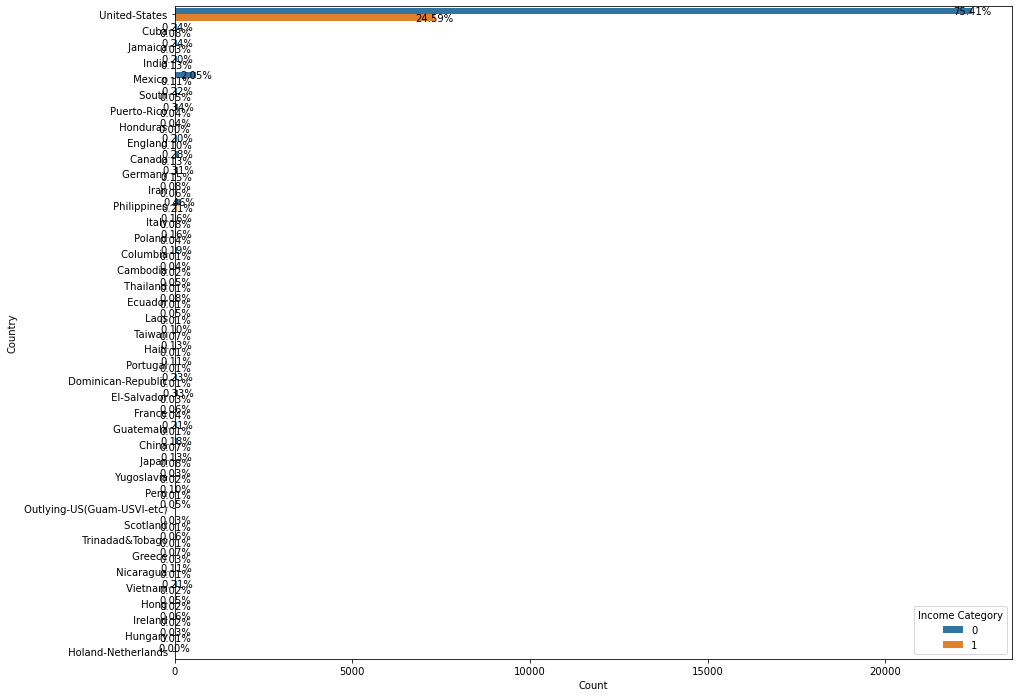

In [130]:
plt.figure(figsize=[15,12])
ax = sns.countplot(y='country', hue='income', data=df)

total = df.groupby('country')['income'].transform('count')
for p in ax.patches:
    x, y = p.get_x() + p.get_width() + 0.2, p.get_y() + p.get_height() / 2
    if np.isfinite(x) and np.isfinite(y):
        ax.text(x, y, '{:.2f}%'.format(100 * p.get_width() / total.max()), ha='center', va='center', fontsize=10)

plt.xlabel('Count')
plt.ylabel('Country')
plt.legend(loc='lower right', title='Income Category')
plt.show()


# Summary of Bivariate Analysis:

## Age:
* People of Age more than 40 are earning high income of more than 50K.

## Education Level:
* People that have higher education level are earning high income of more than 50K.

## Capital Gain & Capital Loss:
* Capital Gain and Capital Loss is mostly seen in the income category of more than 50K.

## Hours per Week:
* People working for more than 40 hours per week are earning high income of more than 50K.

## Profession Class:
* Private work class is leading in both income categories (<=50K and >50K).
* without-pay and never-worked has minimum count in Profession Class attribute.
* There is imbalance in the categories of Profession Class attribute.

## Education:
* There are 16 unique categories present in the education attribute.
* Hs-grad has most observations (32.5%) of all the education attributes.
* In the income category of <=50K, most of them have education till Hs-grad whereas in the >50K category, people with Bachelors are more in proportion.

## Marital Status:
* This marital-status attribute has 7 unique categories. We have simplied these categories into 2 unique categories as Married and Single.
* Married and Single are almost evenly distributed as 52.1% and 47.9% respectively.
* In the income category of <=50K, most of them belong to Single status (almost 49% of the entire data) whereas in the >50K category, proportion of Married people is high.

## Occupation:
* There are 14 unique categories present in the occupation attribute.
* Prof-specialty has the maximum count but Craft-repair, Exec-managerial and Adm-clerical Sales has comparable number of observations.
* Armed-Forces and Priv-house-serv has minimum samples in the occupation attribute.

## Relationship:
* There are 6 unique categories in the relationship attribute.
* Husband has maximum percentage (41.3%) among all categories followed by not-in-family (25.9%).

## Race:
* There are 5 unique categories in the race attribute.
* Most of them are white which is roughly 85.7%.
* This dataset is totally biased toward the white race.
* Second major race in the dataset is the black with just 9.5%.

## Gender:
* Gender has 2 unique categories Male and Female.
* Almost 68% of the data contains information about Males.

## Country:
* This dataset is taken from the US Census Database.
* As 91.5% of them have country United States, the rest are immigrants

# Multivariate Analysis


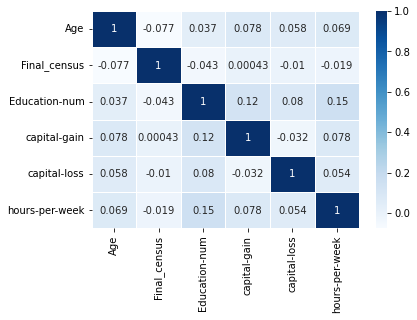

In [83]:
sns.heatmap(df[num_col].corr(), annot=True, cmap='Blues', linewidths = .5)
plt.show()

* There is no strong correlation among the numeric attributes.
* There is neither strong positive nor strong negative correlation present in any variable.


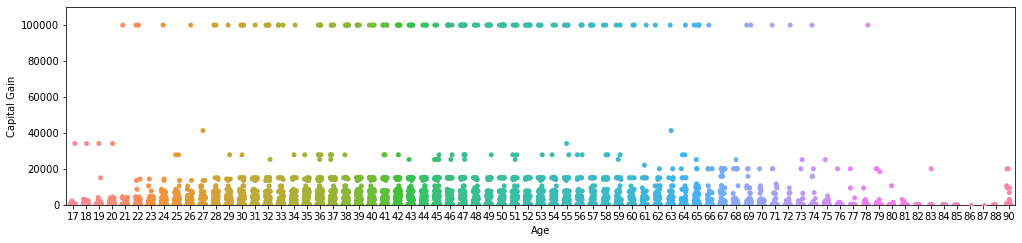

In [86]:
fig = plt.figure(figsize=[17,8])
ax = fig.add_subplot(2,1,1)
sns.stripplot(data=df, x='Age', y='capital-gain', jitter=0.2, ax=ax)
plt.xlabel('Age')
plt.ylabel('Capital Gain')
plt.ylim(0,110000)
plt.show()

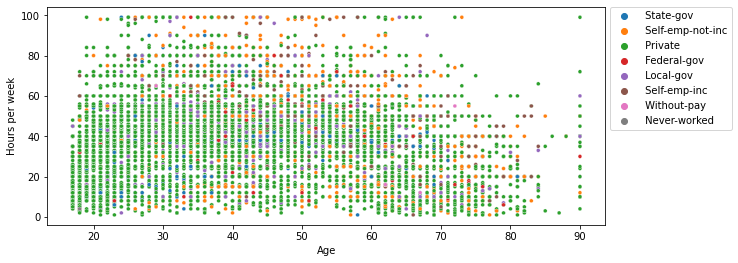

In [87]:
plt.figure(figsize=[10,4])
sns.scatterplot(data=df, x='Age', y='hours-per-week', hue='Profession Class', s=15)
plt.xlabel('Age')
plt.ylabel('Hours per week')
plt.legend(bbox_to_anchor=(1,1.025), loc='best')
plt.show()

* Capital gain of 99999 doesn't follow any pattern and from plots above it clearly distinguishes to be an outlier.
* Our dataset has people with age 90 and working for 40 hours per week in goverment or private sectors which is rare.

## Replacing Income group (<=50K) with 0 and Income group (>50K) with 1 using Label Encoder

In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['income'] = le.fit_transform(df['income'])
df.head()

,Age,Profession Class,Final_census,Education,Education-num,marital-status,occupation,relationship,race,Gender,capital-gain,capital-loss,hours-per-week,country,income
0,39,State-gov,77516,Bachelors,13,Single,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Single,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,234721,11th,7,Married,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0


## Hypothesis Testing

## 1. Testing relationship between Income Groups and Numeric Attributes
### Checking if the means of the numeric attributes are similar in both the income groups or not using Two Sample t-Test

* Null Hypothesis - The Means of Numeric Attributes for income groups >50K and <=50K are same.
* Alternate Hypothesis - The Means of Numeric Attributes for income group >50K and <=50K are not same.


In [89]:
import random
from scipy.stats import ttest_ind

In [90]:
l1 = [i for i in df.columns if (df[i].dtype != 'object') & (i != 'income')]
print(l1)

['Age', 'Final_census', 'Education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


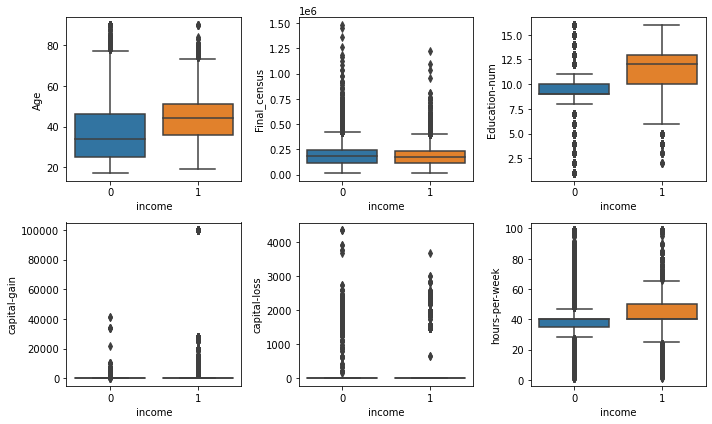

In [93]:
fig, axes = plt.subplots(2,3, figsize=[10,6])
sns.boxplot(data=df, x='income', y='Age', ax=axes[0,0])
sns.boxplot(data=df, x='income', y='Final_census', ax=axes[0,1])
sns.boxplot(data=df, x='income', y='Education-num', ax=axes[0,2])
sns.boxplot(data=df, x='income', y='capital-gain', ax=axes[1,0])
sns.boxplot(data=df, x='income', y='capital-loss', ax=axes[1,1])
sns.boxplot(data=df, x='income', y='hours-per-week', ax=axes[1,2])
plt.tight_layout()

In [95]:
df[['income','Age']].groupby(['income'], as_index=False).mean().sort_values(by='Age', ascending=False)

,income,Age
1,1,44.249841
0,0,36.783738


In [96]:
df[['income', 'Final_census']].groupby(['income'], as_index=False).mean().sort_values(by='Final_census', ascending=False)

,income,Final_census
0,0,190340.86517
1,1,188005.00000


In [98]:
df[['income', 'Education-num']].groupby(['income'], as_index=False).mean().sort_values(by='Education-num', ascending=False)

,income,Education-num
1,1,11.611657
0,0,9.595065


In [99]:
df[['income', 'capital-gain']].groupby(['income'], as_index=False).mean().sort_values(by='capital-gain', ascending=False)

,income,capital-gain
1,1,4006.142456
0,0,148.752468


In [100]:
df[['income', 'capital-loss']].groupby(['income'], as_index=False).mean().sort_values(by='capital-loss', ascending=False)

,income,capital-loss
1,1,195.001530
0,0,53.142921


In [101]:
df[['income', 'hours-per-week']].groupby(['income'], as_index=False).mean().sort_values(by='hours-per-week', ascending=False)

,income,hours-per-week
1,1,45.473026
0,0,38.840210


In [103]:
for i in l1:    
    df_z = df[(np.abs(stats.zscore(df[i])) < 3)] # Removing Outliers
    income_1 = df_z[df_z['income']==1][i]
    income_0 = df_z[df_z['income']==0][i]
    income_1 = income_1.values.tolist()
    income_1 = random.sample(income_1, 100)
    income_0 = income_0.values.tolist()
    income_0 = random.sample(income_0, 100)

    alpha = 0.05
    ttest, pval = ttest_ind(income_1, income_0, equal_var=False, random_state=0)
    print('\nResults of Hypothesis Test:', i)
    print('ttest', ttest)
    print('p value', pval)
    if pval < alpha:
        print('--> We REJECT the Null Hypothesis i.e. there is a significant difference in the means'
             f'\n\t--> "{i}" has some contributions to distinguish the income groups')
    else:
        print('--> We ACCEPT the Null Hypothesis i.e. there is no significant difference in the means'
             f'\n\t--> Income is not dependent on "{i}"')


Results of Hypothesis Test: Age
ttest 4.46933610016061
p value 1.3853267894338873e-05
--> We REJECT the Null Hypothesis i.e. there is a significant difference in the means
	--> "Age" has some contributions to distinguish the income groups

Results of Hypothesis Test: Final_census
ttest -0.7007130580976286
p value 0.48431222969735477
--> We ACCEPT the Null Hypothesis i.e. there is no significant difference in the means
	--> Income is not dependent on "Final_census"

Results of Hypothesis Test: Education-num
ttest 6.893004625812173
p value 7.22443716561234e-11
--> We REJECT the Null Hypothesis i.e. there is a significant difference in the means
	--> "Education-num" has some contributions to distinguish the income groups

Results of Hypothesis Test: capital-gain
ttest 4.213229203123626
p value 5.273507128863104e-05
--> We REJECT the Null Hypothesis i.e. there is a significant difference in the means
	--> "capital-gain" has some contributions to distinguish the income groups

Results of H

## 2. Testing relationship between Income Groups and Categorical Attributes

### Checking if there is any association of categorical attributes in distinguishing the income groups using Chi-squared test

In [104]:
l2=[]
for i in df.columns:
    if df[i].dtypes=='object':        
        l2.append(i)
print(l2)

['Profession Class', 'Education', 'marital-status', 'occupation', 'relationship', 'race', 'Gender', 'country']


In [105]:
from scipy.stats import chi2_contingency
from scipy.stats import chi2

* Null Hypothesis (H0) - There is no significance of the Categorical Attribute on income.
* Alternate Hypothesis (H1) - There is some significance of the Categorical Attribute on income.

In [106]:
for i in l2:
    c_t = pd.crosstab(df[i].sample(frac=0.002, replace=True, random_state=0),
                      df['income'].sample(frac=0.002, replace=True, random_state=0),
                      margins = False)
    stat, pval, dof, expected = chi2_contingency(c_t)
    print('\nResults of Chi-squared Hypothesis Test for:', i)
    print('dof=%d' % dof)
    print('p value', pval)
    prob = 0.95
    critical_value = chi2.ppf(prob, dof)
    print('Critical Value %.3f\nstat %.3f' % (critical_value, stat))
    if abs(stat) >= critical_value:
        print(f'--> We REJECT the Null Hypothesis (H0). There is some relationship between {i} and income.'
             f'\n\t--> "{i}" is Dependent for Income')
    else:
        print(f'--> We FAIL TO REJECT the Null Hypothesis (H0). There is no relationship between {i} and income.'
             f'\n\t--> "{i}" is Independent for Income')



Results of Chi-squared Hypothesis Test for: Profession Class
dof=5
p value 0.009377911307263745
Critical Value 11.070
stat 15.242
--> We REJECT the Null Hypothesis (H0). There is some relationship between Profession Class and income.
	--> "Profession Class" is Dependent for Income

Results of Chi-squared Hypothesis Test for: Education
dof=12
p value 0.0013526135560994535
Critical Value 21.026
stat 32.064
--> We REJECT the Null Hypothesis (H0). There is some relationship between Education and income.
	--> "Education" is Dependent for Income

Results of Chi-squared Hypothesis Test for: marital-status
dof=1
p value 0.01306564345938318
Critical Value 3.841
stat 6.160
--> We REJECT the Null Hypothesis (H0). There is some relationship between marital-status and income.
	--> "marital-status" is Dependent for Income

Results of Chi-squared Hypothesis Test for: occupation
dof=11
p value 0.40915701466908877
Critical Value 19.675
stat 11.415
--> We FAIL TO REJECT the Null Hypothesis (H0). There 

# Model Building

## Feature Elimination

In [109]:
df.columns

Index(['Age', 'Profession Class', 'Final_census', 'Education', 'Education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'Gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'income'],
      dtype='object')

In [110]:
df_1 = df.drop(labels=['Profession Class', 'Education', 'occupation', 'relationship', 'race', 'Gender', 'country'], axis=1)
df_1["marital-status"] = df_1["marital-status"].map({"Married":1, "Single":0})
df_1["marital-status"] = df_1["marital-status"].astype(int)
df_1

,Age,Final_census,Education-num,marital-status,capital-gain,capital-loss,hours-per-week,income
0,39,77516,13,0,2174,0,40,0
1,50,83311,13,1,0,0,13,0
2,38,215646,9,0,0,0,40,0
3,53,234721,7,1,0,0,40,0
4,28,338409,13,1,0,0,40,0
...,...,...,...,...,...,...,...,...
32556,27,257302,12,1,0,0,38,0
32557,40,154374,9,1,0,0,40,1
32558,58,151910,9,0,0,0,40,0
32559,22,201490,9,0,0,0,20,0


In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [112]:
X = df_1.iloc[:,:-1]
X.head()

,Age,Final_census,Education-num,marital-status,capital-gain,capital-loss,hours-per-week
0,39,77516,13,0,2174,0,40
1,50,83311,13,1,0,0,13
2,38,215646,9,0,0,0,40
3,53,234721,7,1,0,0,40
4,28,338409,13,1,0,0,40


In [115]:
y = df_1.iloc[:,-1]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: int32

# Train Test Split and Cross Validation

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=0)

In [117]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)
print('--- Logistic Regression ---')
print('Accuracy Score : %.3f%%' % (100*accuracy_score(y_test, LR_pred)))
LR_score = cross_val_score(LogisticRegression(solver='liblinear'), X, y, cv=3, scoring='accuracy')
print(LR_score)
print('Average Cross Validation Score : %.3f%%' % (100*np.average(LR_score)))
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)
KNN_pred = KNN.predict(X_test)
print('\n--- K-Nearest Neighbors ---')
print('Accuracy Score : %.3f%%' % (100*accuracy_score(y_test, KNN_pred)))
KNN_score = cross_val_score(KNeighborsClassifier(), X, y, cv=3, scoring='accuracy')
print(KNN_score)
print('Average Cross Validation Score : %.3f%%' % (100*np.average(KNN_score))) 
CART = DecisionTreeClassifier()
CART.fit(X_train, y_train)
CART_pred = CART.predict(X_test)
print('\n--- Decision Tree ---')
print('Accuracy Score : %.3f%%' % (100*accuracy_score(y_test, CART_pred)))
CART_score = cross_val_score(DecisionTreeClassifier(), X, y, cv=3, scoring='accuracy')
print(CART_score)
print('Average Cross Validation Score : %.3f%%' % (100*np.average(CART_score)))
NB = GaussianNB()
NB.fit(X_train, y_train)
NB_pred = NB.predict(X_test)
print('\n--- Naive-Bayes ---')
print('Accuracy Score : %.3f%%' % (100*accuracy_score(y_test, NB_pred)))
NB_score = cross_val_score(GaussianNB(), X, y, cv=3, scoring='accuracy')
print(NB_score)
print('Average Cross Validation Score : %.3f%%' % (100*np.average(NB_score)))
RF = RandomForestClassifier(random_state=0)
RF.fit(X_train, y_train)
RF_pred = RF.predict(X_test)
print('\n--- Random Forest ---')
print('Accuracy Score : %.3f%%' % (100*accuracy_score(y_test, RF_pred)))
RF_score = cross_val_score(RF, X, y, cv=3, scoring='accuracy')
print(RF_score)
print('Average Cross Validation Score : %.3f%%' % (100*np.average(RF_score)))

--- Logistic Regression ---
Accuracy Score : 79.536%
[0.79463792 0.79767828 0.79959458]
Average Cross Validation Score : 79.730%

--- K-Nearest Neighbors ---
Accuracy Score : 76.932%
[0.77704072 0.77280265 0.77674376]
Average Cross Validation Score : 77.553%

--- Decision Tree ---
Accuracy Score : 80.334%
[0.80541736 0.80431177 0.81323136]
Average Cross Validation Score : 80.765%

--- Naive-Bayes ---
Accuracy Score : 79.499%
[0.79178183 0.79463792 0.79996314]
Average Cross Validation Score : 79.546%

--- Random Forest ---
Accuracy Score : 83.614%
[0.83222775 0.8358209  0.84197918]
Average Cross Validation Score : 83.668%


# Hyperparameter Tuning for Random Forest Classifier

In [118]:
RF = RandomForestClassifier(random_state=0)
param_dist = {
                'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
                'min_samples_split': [int(x) for x in np.linspace(start = 1, stop = 1000, num = 100)],
                'min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 1000, num = 100)],
                'max_depth': list(range(5, 20)),
                'criterion': ['gini', 'entropy'],
                'bootstrap': [True, False]
             }
RF_random = RandomizedSearchCV(
                                estimator=RF,
                                param_distributions=param_dist,
                                n_jobs=-1, cv=3,
                                verbose=3, n_iter=50,
                                scoring='accuracy', random_state=0,
                                return_train_score=True
                              )
RF2 = RF_random.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


In [119]:
print(RF2.best_params_)
print(RF2.best_score_)

{'n_estimators': 2000, 'min_samples_split': 162, 'min_samples_leaf': 41, 'max_depth': 13, 'criterion': 'entropy', 'bootstrap': False}
0.853972153972154


In [120]:
RF = RandomForestClassifier(random_state=0)
forest_params = {
                    'n_estimators': [RF_random.best_params_['n_estimators']-100,
                                     RF_random.best_params_['n_estimators'],
                                     RF_random.best_params_['n_estimators']+100],
                    'min_samples_split': [RF_random.best_params_['min_samples_split']-15,
                                          RF_random.best_params_['min_samples_split']-5,
                                          RF_random.best_params_['min_samples_split'],
                                          RF_random.best_params_['min_samples_split']+5,
                                          RF_random.best_params_['min_samples_split']+15],
                    'min_samples_leaf': [RF_random.best_params_['min_samples_leaf']-15,
                                         RF_random.best_params_['min_samples_leaf']-5,
                                         RF_random.best_params_['min_samples_leaf'],
                                         RF_random.best_params_['min_samples_leaf']+5,
                                         RF_random.best_params_['min_samples_leaf']+15],
                    'max_depth': [RF_random.best_params_['max_depth']],
                    'criterion': [RF_random.best_params_['criterion']],
                    'bootstrap': [RF_random.best_params_['bootstrap']]
                 
}
RF_grid = GridSearchCV(
                        estimator=RF,
                        param_grid=forest_params,
                        n_jobs=-1, cv=3,
                        verbose=3, scoring='accuracy',
                        return_train_score=True
                      )
RF3 = RF_grid.fit(X_train, y_train)

Fitting 3 folds for each of 75 candidates, totalling 225 fits


In [121]:
print(RF3.best_params_)
print(RF3.best_score_)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 13, 'min_samples_leaf': 26, 'min_samples_split': 177, 'n_estimators': 2100}
0.8546683046683047


# Finalizing Model


===== Random Forest Classifier after Hyperparameter Tuning =====
Accuracy Score : 85.260%
Average Cross Validation Score : 85.443%
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.95      0.91      6159
           1       0.77      0.56      0.65      1982

    accuracy                           0.85      8141
   macro avg       0.82      0.75      0.78      8141
weighted avg       0.85      0.85      0.84      8141

Confusion Matrix:


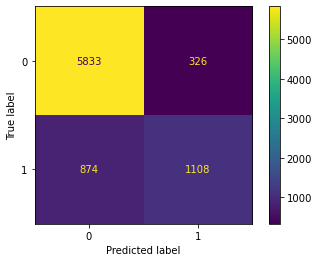

In [122]:
print('\n===== Random Forest Classifier after Hyperparameter Tuning =====')
random_forest = RandomForestClassifier(
                                        n_estimators=2100,
                                        min_samples_split=147,
                                        min_samples_leaf=26,
                                        max_depth=13,
                                        criterion='entropy',
                                        bootstrap=False,
                                        random_state=0
                                       )
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)
print('Accuracy Score : %.3f%%' % (100*accuracy_score(y_test, y_pred)))

cv_score = cross_val_score(random_forest, X, y, cv=3, scoring='accuracy')

print('Average Cross Validation Score : %.3f%%' % (100*np.average(cv_score)))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

## Here we can see that Random Forest Classifier gives highest accuracy of 85% and performing the best after Hyperparameter Tuning, making it the most apt algorithm to be used further in predicting data about whether a person's income is less than or greater than $50K.

